In [1]:
import pandas as pd 
import numpy as np
import os 
import requests
import urllib
import ssl

In [2]:
acc_df = pd.read_csv('accredited_images.csv')
unacc_df = pd.read_csv('unaccredited_images.csv')

In [3]:
acc_df.head()

,Unnamed: 0,image_urls
0,0,https://acariahealth.envolvehealth.com/content...
1,1,https://acariahealth.envolvehealth.com/content...
2,2,https://acariahealth.envolvehealth.com/content...
3,3,https://acariahealth.envolvehealth.com/content...
4,4,https://acariahealth.envolvehealth.com/content...


In [4]:
## removes spaces and other inconsistencies in the unaccredited urls 

unacc_df['image_urls'] = unacc_df['image_urls'].str.replace(' ', '')
unacc_df['image_urls'] = unacc_df['image_urls'].str.replace('.md..', '.md.')

In [5]:
unacc_df

,Unnamed: 0,image_urls
0,0,https://static.wixstatic.com/media/3e04e6_80c2...
1,1,https://static.wixstatic.com/media/3e04e6_f842...
2,2,https://static.wixstatic.com/media/3e04e6_d015...
3,3,https://static.wixstatic.com/media/3e04e6_732c...
4,4,https://static.wixstatic.com/media/40120c_f196...
...,...,...
734,734,https://drugsforhealth.org/images/i_bitcoin.png
735,735,https://drugsforhealth.org/themes/theme1/img/b...
736,736,https://buyamoxicillinnorx.comAmoxicillin.jpg
737,737,https://buyazithromycinnorx.comAzithromycin.jpg


In [6]:
acc_list = acc_df['image_urls'].tolist()
unacc_list = unacc_df['image_urls'].tolist()

In [7]:
def sort_urls(raw_links_list):
    url_list = []
    bad_urls = []
    for each in raw_links_list:
        try:
            headers = {'user-agent': 'ds6050 (vkb6bn@virginia.edu)'}
            results = requests.get(each, headers=headers, timeout=2.0)
        except requests.exceptions.RequestException as e:
            #print('Bad URL: ' + each)
            bad_urls.append(each)
            continue
        #print(results)
        #print(each) 
        if results.status_code == 200:
            url_list.append(each)
    return url_list, bad_urls

In [8]:
acc_img_urls, acc_img_bad = sort_urls(acc_list)

In [ ]:
# acc_img_urls

In [9]:
unacc_img_urls, unacc_img_bad = sort_urls(unacc_list)

Create directory of folders

** ONLY RUN ONCE

In [10]:
try: 
    os.mkdir('images')
    os.chdir('images')
    
    os.mkdir('accredited')
    os.chdir('accredited')

    path = os.getcwd()
    parent = os.path.dirname(path)
    new_path = os.chdir(parent)
    # print(new_path)
    
    os.mkdir('unaccredited')
    print('Directory created')
    
except:
    pass

Directory created


In [11]:
acc_path = './accredited/'
unacc_path = './unaccredited/'   

In [12]:
os.getcwd()

'/sfs/qumulo/qhome/fdf7gn/images'

In [13]:
# make sure path opens the accredited folder, change if needed
os.chdir(acc_path)

In [14]:
def download_images(images):
    ssl._create_default_https_context = ssl._create_unverified_context # bypasses SSL errors
    icount=1
    for each in images:
        try:
            if each.endswith('.jpg'):
                urllib.request.urlretrieve(each, f'pic_{str(icount)}.jpg')
            icount += 1
            if each.endswith('.png'):
                urllib.request.urlretrieve(each, f'pic_{str(icount)}.png')
            icount += 1
        except urllib.error.HTTPError as he:
           # print(he.code)
            continue
        except urllib.error.SSLCertVerificationError as ue:
           # print(ue.code)
            continue
    return icount

** realized the icount is wrong bc it counts every pic whether it downloads or not, not sure how to fix this

In [15]:
download_images(acc_img_urls)

814

should have 394 images in acc folder

In [16]:
path = os.getcwd()
parent = os.path.dirname(path)
new_path = os.chdir(parent)

In [17]:
new_path

In [18]:
os.chdir(unacc_path)

In [19]:
os.getcwd()

'/sfs/qumulo/qhome/fdf7gn/images/unaccredited'

In [20]:
download_images(unacc_img_urls)

842

should have 406 images in unacc folder

In [22]:
!pip install split-folders

Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 60.9 MB 14.4 MB/s eta 0:00:01


In [136]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import splitfolders

In [86]:
os.chdir('/sfs/qumulo/qhome/fdf7gn/images/')

In [137]:
os.getcwd()

'/sfs/qumulo/qhome/fdf7gn/images'

In [138]:

splitfolders.ratio('/sfs/qumulo/qhome/fdf7gn/images', output="split", seed=123, ratio=(.8, 0.1,0.1)) 

Copying files: 794 files [00:06, 123.09 files/s]


In [147]:
train_path="/sfs/qumulo/qhome/fdf7gn/images/split/train"
test_path="/sfs/qumulo/qhome/fdf7gn/images/split/test"
val_path="/sfs/qumulo/qhome/fdf7gn/images/split/val"

In [148]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        #try:
        img_arr=cv2.resize(img_arr,(224,224))
        #except:
        #    break
        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [149]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [150]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [151]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [152]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 634 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [153]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [154]:
training_set.class_indices

{'accredited': 0, 'unaccredited': 1}

In [155]:
train_y.shape,test_y.shape,val_y.shape

((634,), (82,), (78,))

In [156]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [157]:
for layer in vgg.layers:
    layer.trainable = False

In [158]:
x = Flatten()(vgg.output)

In [159]:
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [160]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [161]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [162]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [163]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
20/20 [==============================] - 17s 836ms/step - loss: 0.8421 - accuracy: 0.6782 - val_loss: 0.4888 - val_accuracy: 0.7692
Epoch 2/10
20/20 [==============================] - 17s 842ms/step - loss: 0.2870 - accuracy: 0.8912 - val_loss: 0.3338 - val_accuracy: 0.8974
Epoch 3/10
20/20 [==============================] - 16s 821ms/step - loss: 0.1447 - accuracy: 0.9479 - val_loss: 0.3112 - val_accuracy: 0.9231
Epoch 4/10
20/20 [==============================] - 17s 830ms/step - loss: 0.0953 - accuracy: 0.9842 - val_loss: 0.3151 - val_accuracy: 0.9103
Epoch 5/10
20/20 [==============================] - 16s 829ms/step - loss: 0.0721 - accuracy: 0.9921 - val_loss: 0.2955 - val_accuracy: 0.9103
Epoch 6/10
20/20 [==============================] - 16s 827ms/step - loss: 0.0571 - accuracy: 0.9937 - val_loss: 0.3129 - val_accuracy: 0.9103
Epoch 7/10
20/20 [==============================] - 17s 856ms/step - loss: 0.0510 - accuracy: 0.9953 - val_loss: 0.3083 - val_accuracy: 0.9103

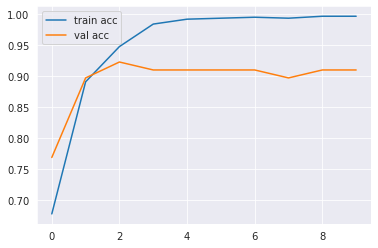

In [164]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

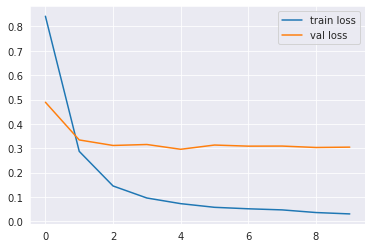

In [165]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [119]:
model.evaluate(test_x,test_y,batch_size=32)

3/3 [==============================] - 2s 588ms/step - loss: 16.5114 - accuracy: 0.0732


[16.511411666870117, 0.0731707289814949]

In [167]:
vgg_acc = model.evaluate(test_x,test_y,batch_size=32)[1]

3/3 [==============================] - 2s 572ms/step - loss: 0.4463 - accuracy: 0.8415


In [168]:
vgg_acc

0.8414633870124817

In [169]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [170]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

3/3 [==============================] - 2s 610ms/step


In [171]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.81      0.87      0.84        39

    accuracy                           0.84        82
   macro avg       0.84      0.84      0.84        82
weighted avg       0.84      0.84      0.84        82



In [172]:
print(confusion_matrix(y_pred,test_y))

[[35  8]
 [ 5 34]]


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [174]:
labels = ['accredited', 'unaccredited']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [175]:
train = get_data('/sfs/qumulo/qhome/fdf7gn/images/split/train')
val = get_data('/sfs/qumulo/qhome/fdf7gn/images/split/test')

<ipython-input-174-8c9aff821d98>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


/apps/software/standard/compiler/gcc/9.2.0/jupyter_conda/2020.11-py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

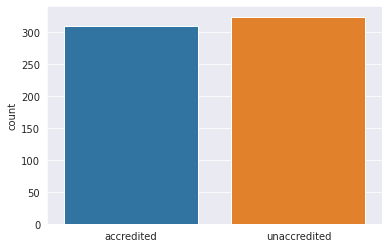

In [176]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("accredited")
    else:
        l.append("unaccredited")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'accredited')

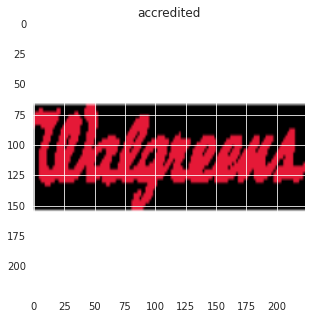

In [177]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'unaccredited')

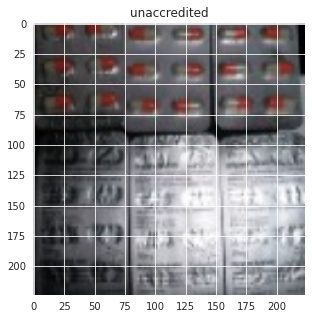

In [178]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [179]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [180]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [181]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [182]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/home/fdf7gn/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [183]:
history = model.fit(x_train,y_train,epochs = 300 , validation_data = (x_val, y_val))

Epoch 1/300


/home/fdf7gn/.local/lib/python3.8/site-packages/keras/backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 [==============================] - 7s 326ms/step - loss: 0.6960 - accuracy: 0.5347 - val_loss: 0.6830 - val_accuracy: 0.5488
Epoch 2/300
20/20 [==============================] - 6s 319ms/step - loss: 0.6862 - accuracy: 0.5379 - val_loss: 0.6810 - val_accuracy: 0.5610
Epoch 3/300
20/20 [==============================] - 6s 315ms/step - loss: 0.6889 - accuracy: 0.5457 - val_loss: 0.6797 - val_accuracy: 0.5976
Epoch 4/300
20/20 [==============================] - 6s 305ms/step - loss: 0.6895 - accuracy: 0.5584 - val_loss: 0.6775 - val_accuracy: 0.5976
Epoch 5/300
20/20 [==============================] - 6s 311ms/step - loss: 0.6831 - accuracy: 0.5473 - val_loss: 0.6755 - val_accuracy: 0.6098
Epoch 6/300
20/20 [==============================] - 6s 309ms/step - loss: 0.6796 - accuracy: 0.5962 - val_loss: 0.6738 - val_accuracy: 0.6220
Epoch 7/300
20/20 [==============================] - 6s 306ms/step - loss: 0.6787 - accuracy: 0.6088 - val_loss: 0.6716 - val_accuracy: 0.5976
Epoch 8/300

In [184]:
cnn_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 31ms/step - loss: 0.5049 - accuracy: 0.8659


In [185]:
cnn_acc

0.8658536672592163

ValueError: x and y must have same first dimension, but have shapes (500,) and (300,)

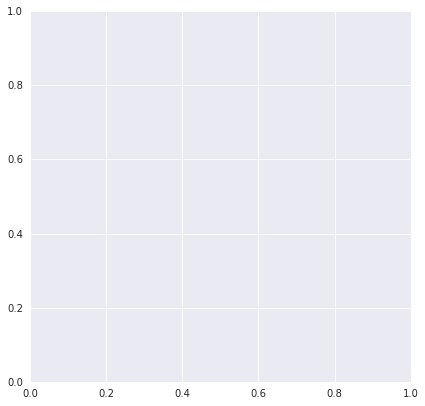

In [186]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [187]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [188]:
base_model.trainable = False

In [189]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(18, activation="softmax")                                     
                                ])

In [190]:
base_learning_rate = 0.0012
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

Epoch 1/50
20/20 [==============================] - 6s 180ms/step - loss: 1.0524 - accuracy: 0.5552 - val_loss: 0.4933 - val_accuracy: 0.8171
Epoch 2/50
20/20 [==============================] - 3s 149ms/step - loss: 0.4193 - accuracy: 0.8249 - val_loss: 0.4353 - val_accuracy: 0.8537
Epoch 3/50
20/20 [==============================] - 3s 145ms/step - loss: 0.3593 - accuracy: 0.8675 - val_loss: 0.3852 - val_accuracy: 0.8659
Epoch 4/50
20/20 [==============================] - 3s 145ms/step - loss: 0.3291 - accuracy: 0.8659 - val_loss: 0.3472 - val_accuracy: 0.8780
Epoch 5/50
20/20 [==============================] - 3s 143ms/step - loss: 0.2817 - accuracy: 0.8864 - val_loss: 0.3350 - val_accuracy: 0.8780
Epoch 6/50
20/20 [==============================] - 3s 142ms/step - loss: 0.2537 - accuracy: 0.9132 - val_loss: 0.3354 - val_accuracy: 0.8780
Epoch 7/50
20/20 [==============================] - 3s 142ms/step - loss: 0.2229 - accuracy: 0.9117 - val_loss: 0.3044 - val_accuracy: 0.8659
Epoch 

In [191]:
model.evaluate(x=x_val, y=y_val)

3/3 [==============================] - 0s 103ms/step - loss: 0.2894 - accuracy: 0.8780


[0.2894240915775299, 0.8780487775802612]

In [192]:
mobilenet_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 0s 109ms/step - loss: 0.2894 - accuracy: 0.8780


In [193]:
mobilenet_acc

0.8780487775802612

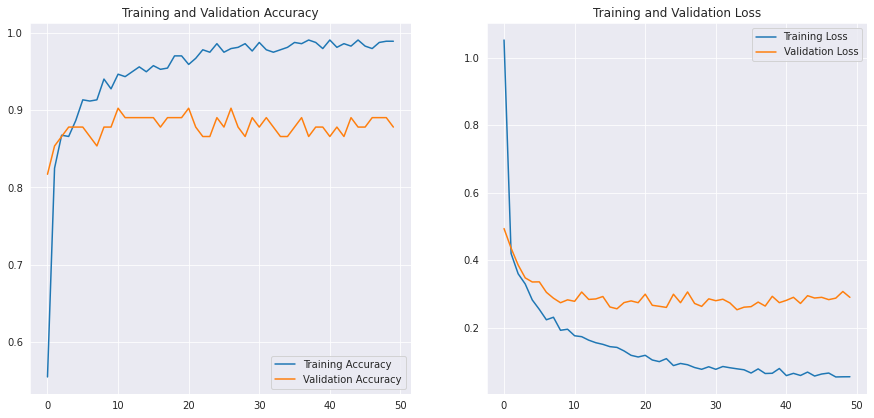

In [194]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['accredited (Class 0)','unaccredited (Class 1)']))

In [195]:
base_model = keras.applications.ResNet50(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(18, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [196]:
for layer in base_model.layers:
    layer.trainable = False
base_learning_rate = 0.0012
optimizer = keras.optimizers.Adam(lr=base_learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(x_train,y_train,
                    validation_data=(x_val, y_val),
                    batch_size=32,
                    epochs=50)

Epoch 1/50
20/20 [==============================] - 12s 495ms/step - loss: 1.3487 - accuracy: 0.4401 - val_loss: 0.7090 - val_accuracy: 0.4878
Epoch 2/50
20/20 [==============================] - 9s 453ms/step - loss: 0.6626 - accuracy: 0.5899 - val_loss: 0.6790 - val_accuracy: 0.5610
Epoch 3/50
20/20 [==============================] - 9s 455ms/step - loss: 0.6351 - accuracy: 0.6435 - val_loss: 0.6599 - val_accuracy: 0.7073
Epoch 4/50
20/20 [==============================] - 9s 454ms/step - loss: 0.6319 - accuracy: 0.6640 - val_loss: 0.6570 - val_accuracy: 0.6220
Epoch 5/50
20/20 [==============================] - 9s 450ms/step - loss: 0.6118 - accuracy: 0.6909 - val_loss: 0.6494 - val_accuracy: 0.6829
Epoch 6/50
20/20 [==============================] - 9s 449ms/step - loss: 0.6028 - accuracy: 0.6987 - val_loss: 0.6457 - val_accuracy: 0.7073
Epoch 7/50
20/20 [==============================] - 9s 453ms/step - loss: 0.5975 - accuracy: 0.6972 - val_loss: 0.6407 - val_accuracy: 0.7073
Epoch

In [31]:
model.evaluate(x=x_val, y=y_val)

3/3 [==============================] - 1s 316ms/step - loss: 0.5911 - accuracy: 0.7683


[0.591094434261322, 0.7682926654815674]

In [197]:
resnet_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 1s 334ms/step - loss: 0.5915 - accuracy: 0.7927


In [198]:
resnet_acc

0.792682945728302

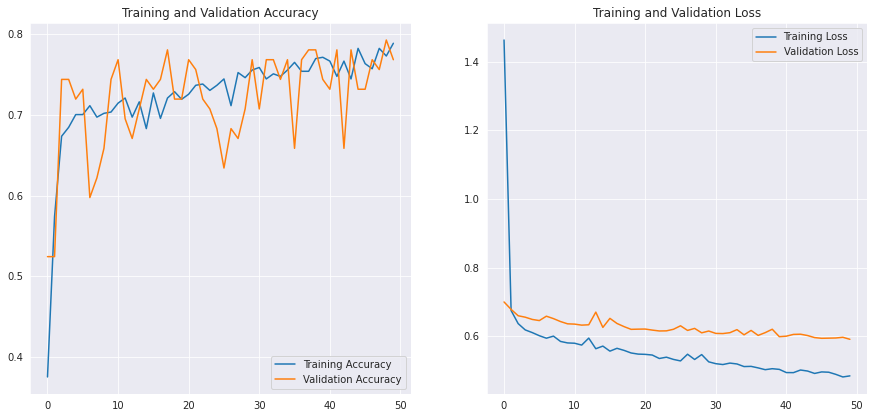

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
base_model = keras.applications.xception.Xception(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(18, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [43]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(x_train,y_train,
                    validation_data=(x_val, y_val),
                    batch_size=32,
                    epochs=50)

Epoch 1/50
20/20 [==============================] - 10s 432ms/step - loss: 2.8665 - accuracy: 0.0820 - val_loss: 2.3273 - val_accuracy: 0.3049
Epoch 2/50
20/20 [==============================] - 8s 397ms/step - loss: 2.0541 - accuracy: 0.2871 - val_loss: 1.6701 - val_accuracy: 0.3293
Epoch 3/50
20/20 [==============================] - 8s 385ms/step - loss: 1.5507 - accuracy: 0.3281 - val_loss: 1.3126 - val_accuracy: 0.3780
Epoch 4/50
20/20 [==============================] - 8s 380ms/step - loss: 1.2682 - accuracy: 0.3659 - val_loss: 1.1110 - val_accuracy: 0.4878
Epoch 5/50
20/20 [==============================] - 8s 386ms/step - loss: 1.0979 - accuracy: 0.4716 - val_loss: 0.9831 - val_accuracy: 0.5366
Epoch 6/50
20/20 [==============================] - 8s 382ms/step - loss: 0.9800 - accuracy: 0.5536 - val_loss: 0.8917 - val_accuracy: 0.5610
Epoch 7/50
20/20 [==============================] - 8s 381ms/step - loss: 0.8921 - accuracy: 0.5978 - val_loss: 0.8219 - val_accuracy: 0.5854
Epoch

In [44]:
model.evaluate(x=x_val, y=y_val)

3/3 [==============================] - 1s 268ms/step - loss: 0.3812 - accuracy: 0.8659


[0.38118240237236023, 0.8658536672592163]

In [47]:
xception_acc = model.evaluate(x=x_val, y=y_val)[1]

3/3 [==============================] - 1s 275ms/step - loss: 0.3812 - accuracy: 0.8659


In [48]:
xception_acc

0.8658536672592163

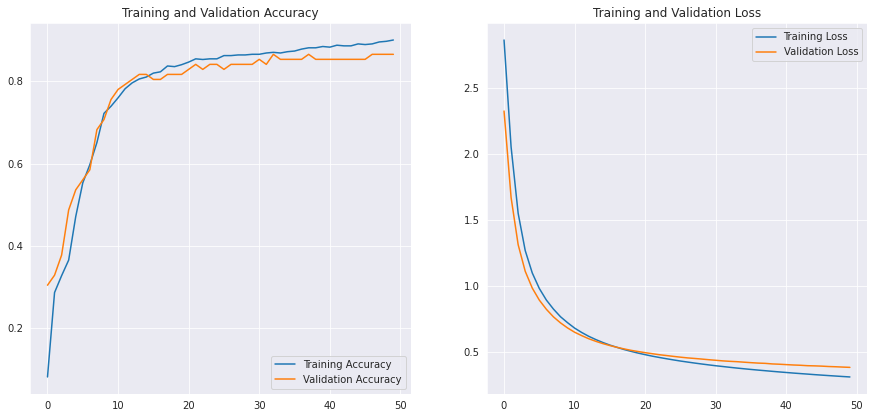

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [199]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [['VGG', vgg_acc], ['CNN', cnn_acc], ['ResNet', resnet_acc],['Xception', xception_acc],['MobileNetV2', mobilenet_acc]  ]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Model', 'Accuracy'])
  
# print dataframe.
df

,Model,Accuracy
0,VGG,0.841463
1,CNN,0.865854
2,ResNet,0.792683
3,Xception,0.865854
4,MobileNetV2,0.878049
